# INDIVIDUAL ASSIGNMENT: DATA ANALYSIS

## THE NIKE KAPERNICK CAMPAIGN

### GUIDING RESOURCES AND HELPER FUNCTIONS

This notebook contains a set of references, utils and predefined functions that are intended to guide the student through the process of tackling the individual assignment.

Materials included here should serve as an initial guideline to preprocess the dataset so that insights can be derived. Bear in mind that complementary steps should be applied in order to perform a full analysis. **Helper functions provided should not be necessarily applied in the order they are given and the student has full flexibility to decide whether to use none of them, some of them or all of them, in any preferred order. Materials are primarily for those students with little to no prior coding experience**.

#### Libraries used

- [Pandas](https://pandas.pydata.org/): a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. We recommend the dataset provided is loaded as a Pandas Dataframe to make data manipulation easier.
- [Natural Language Toolkit](https://www.nltk.org/): a leading platform for building Python programs to work with human language data. From NLTK, we'll recommend some useful methods for tokenizing, lemmatizing, removing stop words, and some more.
- [Scikit Learn](https://scikit-learn.org/stable/): a set of simple and efficient tools for predictive data analysis, built on top of NumPy, SciPy, and matplotlib. Even when predictive analysis is out of the scope of this assignment, scikit learn provides some useful data transformations, some of which might be helpful here.
- [Matplotlib](https://matplotlib.org/): a comprehensive library for creating static, animated, and interactive visualizations in Python. The student is expected to derive and visually present insights from the dataset shared.
- [TextBlob](https://textblob.readthedocs.io/en/dev/): a Python library for processing textual data. Particularly easy to use and helpful for performing sentiment and subjectivity analysis.

#### Useful links

- [General NLP definitions, the distinction between corpus and document](https://moj-analytical-services.github.io/NLP-guidance/Glossary.html)
- [Basics on Pandas Dataframes](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
    - [Reading a CSV with Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
- [Basics on NLTK](https://lost-contact.mit.edu/afs/cs.pitt.edu/projects/nltk/docs/tutorial/introduction/nochunks.html)
- Common Text Preprocessing operations:
    - [Tokenization](https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html)
    - [Removing Stop Words](https://nlp.stanford.edu/IR-book/html/htmledition/dropping-common-terms-stop-words-1.html)
    - [Stemming & Lemmatization](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)
- [Basics on Matplotlib](https://matplotlib.org/stable/tutorials/index.html)
- [How TextBlob works?](https://planspace.org/20150607-textblob_sentiment/)


#### Importing libraries

The first code cell will be used to import all the libraries described above.

In [20]:
# Pandas
import pandas as pd
import dataframe_image as dfi

#String
import string
import re
# NLTK
import nltk
nltk.download('stopwords') # once dependencies are locally downloaded, this line of code is no longer needed
from nltk.corpus import stopwords
nltk.download('wordnet') # once dependencies are locally downloaded, this line of code is no longer needed
nltk.download('punkt') # once dependencies are locally downloaded, this line of code is no longer needed
nltk.download('omw-1.4') # I need to the lemmatization.
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer # Usamos este en lugar del de arriba que esta optimizado para Twits

# Scikit-Learn
from sklearn.feature_extraction.text import CountVectorizer

# Matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# TextBlob
from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Text preprocessing functions

The following functions can help with the first steps when dealing with a corpus of text documents:

In [21]:
from distutils.ccompiler import new_compiler


def lowercase(corpus):
    """
    Turn a dataframe column made of text into lowercase.
    
    Args:
        corpus (Pandas Series): the column to transform to lowercase.
    
    Returns:
        Pandas Series    
    """
    new_corpus = corpus.str.lower()
    return new_corpus



def remove_punct(corpus):
    """ 
    Remove Punctuation from twitter text

    Args: 
        corpus (Pandas Data Series): The columns to remove puntuation 
    
    Returns:
        Pandas Series (I hope)
    
    
        """
    def remove_punt_sentence(text):   # This function is for remove the puntuation,numbers an URL in a specific word in the sentece
        text = re.sub(r"(?:\@|https?\://)\S+", "", text) #Remove URL and twitter @mentions
        text  = "".join([char for char in text if char not in string.punctuation])
        text = re.sub('[0-9]+', '', text) #Remove numbers 
        # text = re.sub(r'http\S+', '', text) #Remove URL
        return text
    
    corpus_without_punct = corpus.apply(lambda x: remove_punt_sentence(x)) # I iterate for each sentence in the Pandas Series, removing the puntuaction. 
    
    return corpus_without_punct



def remove_stop_words_eng(corpus):
    """
    Removes common English stop words from a corpus.
    
    Args:
        corpus (Pandas Series): the column to remove stop words.
        
    Returns:
        Pandas Series
    """
    stop = stopwords.words('english')
    new_corpus = corpus.apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
    
    return new_corpus


def lemma(document):
    """
    Lemmatizes an individual document within a corpus.
    
    Args:
        document (str): a string document on which lemmatization is to be applied.
        
    Returns:
        str
        
    Usage Example:
        df['some text column'] = df['some text column'].apply(lambda text: lemma(text))
    """
    lemmatizer = WordNetLemmatizer()
    word_list = nltk.word_tokenize(document)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    
    return lemmatized_output


def token(corpus):
    """
    Tokenizes and removes punctuation from a corpus.
    
    Args:
        corpus (Pandas Series): the column to tokenize.
    
    Returns:
        Pandas Series
    """
    tokenizer = TweetTokenizer()              #nltk.RegexpTokenizer(r"\w+")    
    new_corpus = corpus.apply(lambda text: tokenizer.tokenize(text))
    
    return new_corpus

#### Further cleansing and plotting

Below functions can be helpful for extracting commonly mentioned words or topics. Initial insights could be derived through using these functions:

In [22]:
def get_top_n_ngrams(corpus, n=10, type ='unigram'):
    """
    Get top n n-grams by their ocurrence in a corpus of text documents.
    
    Args:
        corpus (Pandas Series): a dataframe column made of individual text documents.
        n (int): the number of top ocurrences to return.
        type (str): n-grams to retrieve, 'unigram', 'bigram' and 'trigram' are accepted.
    
    Returns
        List of tuples (n-gram, ocurrences)
    """
    
    if type == 'unigram':
        vec = CountVectorizer().fit(corpus)
    elif type == 'bigram':
        vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    elif type == 'trigram':
        vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:n]


def plot_n_grams(top_n_ngrams, col_name, title):
    """
    Plots top n n-grams in descending order by number of ocurrences along the corpus.
    
    Args:
        top_n_ngrams (list): a list of tuples of the kind (n-gram, ocurrences).
        col_name (str): name to assign to the text variable.
        title (str): chart title.
    """
    data = pd.DataFrame(top_n_ngrams, columns = [col_name , 'Count'])
    fig = plt.figure(figsize = (20,8),edgecolor='grey')
    viz = data.groupby(col_name).sum()['Count'].sort_values(ascending=False).plot(kind='bar', title=title, color='darkred')
    
    return viz

#### Performing sentiment analysis

Below is a useful function to explore polarity and subjectivity within documents:

In [23]:
def compute_sentiment(corpus, kind='polarity'):
    """
    Computes sentiment analysis over a corpus.
    
    Args:
        corpus (Pandas Series): the column on which sentiment analysis is to be applied.
        kind (str), default 'polarity': a string indicating which sentiment attribute to retrieve from 'polarity' or 'subjectivity'.
        
    Returns:
        Pandas Series
    """
    
    if kind == 'polarity':
        sentiment = corpus.apply(lambda text: TextBlob(text).sentiment.polarity)
    elif kind == 'subjectivity':
        sentiment = corpus.apply(lambda text: TextBlob(text).sentiment.subjectivity)
    
    return sentiment 

### Reading the Data

In [24]:
df_tw =  pd.read_csv('G:\Mi unidad\MiM\Modulo 3\Costumer Behaviur\Individual Assignment\_tweets_nikekaepernick.csv')

#df_stroke.drop(['CustomerID'], axis=1, inplace=True)
#I remove the autoincremental values from the dataset. I use the natural index

print(df_tw.columns)
print(f'Tamaño dataset : {df_tw.shape}')
df_tw.head(5)

Index(['tweet_lenght', 'tweet_favs_count', 'tweet_full_text', 'tweet_id',
       'tweet_is_quote_bool', 'tweet_lang', 'tweet_rts_count', 'user_bio',
       'user_favs_count', 'user_followers_count', 'user_id', 'user_name',
       'user_statuses_count', 'user_verified'],
      dtype='object')
Tamaño dataset : (11418, 14)


,tweet_lenght,tweet_favs_count,tweet_full_text,tweet_id,tweet_is_quote_bool,tweet_lang,tweet_rts_count,user_bio,user_favs_count,user_followers_count,user_id,user_name,user_statuses_count,user_verified
0,166,0,White ppl almost killing themselves just to bu...,x1037852811340464128,False,en,0,NaN,2035,559,x292503552,Dynasdee,44042,False
1,23,0,@madmoneymill Nike’s all I wear <U+0001F937><U...,x1037852910137237509,False,en,1,"Stay humble, and strive. USMC veteran. LLL©<U+...",33523,227,x935742289225355264,The_Phenom07,25593,False
2,29,2,@johnrich @Nike Do the same with your socks.. ...,x1037852694541520896,False,en,0,NaN,12,0,x481584622,guadalupelineck,17,False
3,12,1,@SNFonNBC I blame NIKE,x1037852896593735681,False,en,0,NaN,1757,75,x68105970,Jreeezy2000,5946,False
4,280,20,"@CBSNews hey hey hey,\r\nALL COLLEGES MATTER.\...",x1037852654930673664,False,en,3,"Business/Data Analyst, Educator, Authoress, AO...",12713,491,x4220625275,woodson_kb,18269,False


In [25]:
na_values = pd.DataFrame(columns=['features','NA values'])

na_values = pd.concat([df_tw.isna().sum().sort_values(ascending=False)])

features = na_values[22:]

print(f'features with na values: \n {na_values[0:15]}')


features with na values: 
 user_bio                1490
tweet_lenght               0
tweet_favs_count           0
tweet_full_text            0
tweet_id                   0
tweet_is_quote_bool        0
tweet_lang                 0
tweet_rts_count            0
user_favs_count            0
user_followers_count       0
user_id                    0
user_name                  0
user_statuses_count        0
user_verified              0
dtype: int64


In [26]:
df_tw['tweet_full_text']

0        White ppl almost killing themselves just to bu...
1        @madmoneymill Nike’s all I wear <U+0001F937><U...
2        @johnrich @Nike Do the same with your socks.. ...
3                                   @SNFonNBC I blame NIKE
4        @CBSNews hey hey hey,\r\nALL COLLEGES MATTER.\...
                               ...                        
11413    We have what we need.  #JustDoIt https://t.co/...
11414    Even the best can take an L!!\n\n#MGK #RapDevi...
11415    Serena! All Serena, 9 of the last 10 games. If...
11416    @serenawilliams #USOpen2018 Tearing it up your...
11417    WOW the Nike #Justdoit add they played before ...
Name: tweet_full_text, Length: 11418, dtype: object

### Data Cleaning
- Functions

In [105]:
#Cleaninng a corpus
def clean_and_tokenize_df(corpus):
    
    low_corpus = lowercase(corpus)

    stop_low_corpus = remove_stop_words_eng(low_corpus)

    punct_stop_low_corpus = remove_punct(stop_low_corpus)

    lemma_punct_stop_low_corpus = punct_stop_low_corpus.apply(lambda text: lemma(text))

    final_corpus = token(lemma_punct_stop_low_corpus)

    return final_corpus

#I really use that for cleaning the corpus

def clean_df_for_sentiment(corpus):
    '''
    function for cleaning corpus inside of function of text analysis.
    '''
    
    low_corpus = lowercase(corpus)

    stop_low_corpus = remove_stop_words_eng(low_corpus)

    punct_stop_low_corpus = remove_punct(stop_low_corpus)

    lemma_punct_stop_low_corpus = punct_stop_low_corpus.apply(lambda text: lemma(text))

    return lemma_punct_stop_low_corpus

### Vectorization  (functions)

In [28]:
# Tokenizano palabra por palabra no consigo resultado

def vector_for_word(phrase_or_word, corpus,cant_gram='unigram'):
    '''
    choose a word or phase in the corpus withot preproccessing 
    and use the cant_gram argument to choose how many work conected are you looking for)
    example for work justdoit I looking for phases of two works popular in that corpus:
    
    vector_for_word('justdoit',corpus,'bigram')

    you can choose for cant_gram the follower arguments: ['unigram','bigram','trigram']
    '''
    if phrase_or_word != "":
        corpus = df_tw['tweet_full_text']
        #Chossing index for the word selected
        df_index= corpus.str.contains(phrase_or_word)
        filter_corpus = corpus[df_index]
    else:
        filter_corpus = corpus

    df_tw_clean = clean_df_for_sentiment(filter_corpus)

    ngrams = get_top_n_ngrams(df_tw_clean,20,type=cant_gram) # You can use unigram, bigram,trigram

    return plot_n_grams(ngrams, col_name=ngrams[0],title='Most frequent topics in twitter')


### Sentiment Analisis (functions)

In [29]:



def text_sentiment(word,corpus):
    """"
    Choose a word and run the text analysis. 

    You have a second argument for your unprocessed corpus.
    
    """
    print(f'This text Analisis running on Nike Twitts is talking about: {word}')

    #Preprocessing corpus for text analisis 
    df_tw_clean = clean_df_for_sentiment(corpus)

    #Chossing index for the word selected
    nike_index= df_tw_clean.str.contains(word)
    nike_df = df_tw_clean[nike_index]

    # print(df_tw_clean.shape)
    # print(nike_df.shape)

    #Historgram

    nike_sentiment = compute_sentiment(nike_df)
    histogram = plt.hist(nike_sentiment, bins=50)

    
    #Result Matrix 
    negative = nike_df[nike_sentiment < 0].count()
    neutral = nike_df[nike_sentiment == 0].count()
    positive = nike_df[nike_sentiment > 0].count()

    nike_result = pd.DataFrame([negative,neutral,positive], index = ['Negative','Neutral','Positive'], columns = ['Comments Polarity'])
    nike_result['Porcentage'] = (nike_result['Comments Polarity'] / nike_result['Comments Polarity'].sum()).round(2)
    nike_result['Porcentage'] = [str(i*100) +'%' for i in nike_result['Porcentage']]


    #Dataframe with the preproceced text and sentiment analisis
    
    df_corpus_sentiment = pd.DataFrame(nike_df)
    df_corpus_sentiment.columns = ['Corpus']
    nike_sentiment_s = pd.Series(nike_sentiment, dtype=float)
    df_corpus_sentiment['sentiment'] = nike_sentiment_s
    
    
    #display(df_corpus_sentiment.head())
    print(f'Summarize for selection the and text analisis')
    display(nike_result)#dfi.export(nike_result, 'df_result.png')
    return df_corpus_sentiment

def message(df_corpus_sentiment,sentiment):
    '''
    This funtion print the five positive or negative reviews
    '''
    if sentiment == 'positive':
        print('5 five best message')
        for i in range(5): 
            text = df_corpus_sentiment.sort_values(by='sentiment',ascending=False).head().iloc[i,0]
            score= df_corpus_sentiment.sort_values(by='sentiment',ascending=False).head().iloc[i,1]
            print(f'{text} \n Score:{score}')
            print('---------------------------------------------------------------------------')
    elif sentiment =='negative':
        print('5 five most negative messages')
        for i in range(5): 
            text = df_corpus_sentiment.sort_values(by='sentiment',ascending=True).head().iloc[i,0]
            score= df_corpus_sentiment.sort_values(by='sentiment',ascending=True).head().iloc[i,1]
            print(f'{text} \n Score:{score}')
            print('---------------------------------------------------------------------------')
    else:
        print("choose a valid sentiment ['positive','negative']")


## Analisis

### Pruebas de Vectorizacion y Sentiment Analisis

<AxesSubplot:title={'center':'Most frequent topics in twitter'}, xlabel='(colin kaepernick, 830)'>

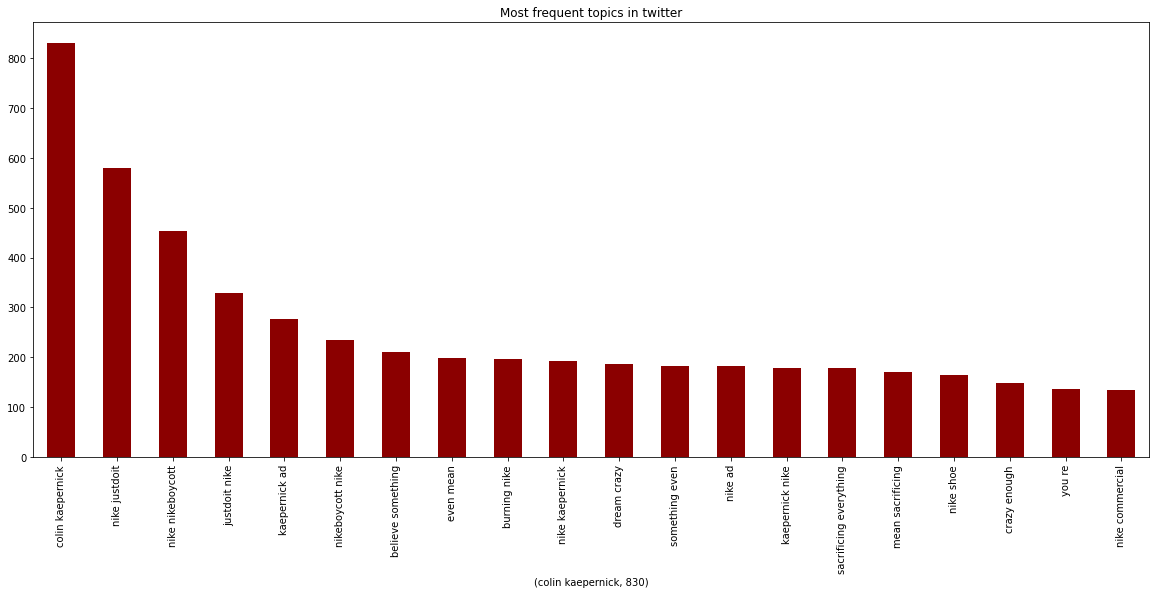

In [91]:
corpus = df_tw['tweet_full_text']

vector_for_word('',corpus,'bigram')

This text Analisis running on Nike Twitts is talking about: donald
Summarize for selection the and text analisis


,Comments Polarity,Porcentage
Negative,26,30.0%
Neutral,23,26.0%
Positive,39,44.0%


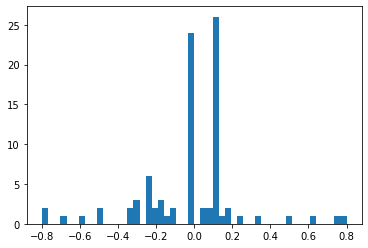

In [31]:
corpus = df_tw['tweet_full_text']
corpus_sent = text_sentiment("donald",corpus)




In [32]:
message(corpus_sent,'negative')


5 five most negative messages
trumpissostupid went inspect navy seal aquarium trump donaldtrump stupid republican woodward kapernick nike nikeboycott potus 
 Score:-0.7999999999999999
---------------------------------------------------------------------------
google this video stupid thing said donald trump justdoit 
 Score:-0.7999999999999999
---------------------------------------------------------------------------
colorado pissed know bad nikeboycott nike kaepernicknike kapernick colorado potus donaldtrump 
 Score:-0.6999999999999998
---------------------------------------------------------------------------
nike dream crazy nike nfl colinkaepernick serenawilliams tennis athlete football lebronjames justdoit er nikeboycott donaldtrump injustice protest via 
 Score:-0.6
---------------------------------------------------------------------------
whats wrong nike making colin kaepernick face campaign yall made donald trump face america justdoit nike 
 Score:-0.5
----------------------

### Cited Post - Principal Entities named 

In [33]:
def tagged_plot(corpus):
    """
    Take a corpus as an argument and retorn a set of people tagged in this twit ploting the most relevant @mentions 
    """
    new_text = corpus.apply(lambda text: set([item for item in text.split() if '@' in item]))
    
    frame_tagged = new_text 

    list_tagged_names = list()

    for line in frame_tagged:
        for mention in line:
            list_tagged_names.append(mention)


    frame_tagged = pd.DataFrame({'tagged' : list_tagged_names})

    frame_tagged = frame_tagged.apply(lambda x : lowercase(x))

    frame_tagged = frame_tagged.apply(lambda x : x.str.strip()) 

    frame_tagged = frame_tagged.apply(lambda x : x.str.lstrip('@')) 

    frame_tagged = frame_tagged.apply(lambda x : remove_punct(x)) 

    plt.figure(figsize=(10,5))
    plot = frame_tagged['tagged'].value_counts().head(20).plot(kind='bar', color = 'darkorange', title="Top 20 @mentions in Twitter dataset")
        
        
    return plot

def tagged_index(name,corpus):
    """
    Take a mention y devuelve los indices del dataframe donde aparecen
    # Hay que escribir el @mention con mayuscula al principio porque es sensible
    # Nike 
    # Kaepernick
    # NFL
    """
    new_text = corpus.apply(lambda text: set([item for item in text.split() if "@" in item]))
    
    tagged_df = pd.DataFrame({'tagged':new_text})

    index = []
    for i in range(len(tagged_df)):
        for tag in tagged_df['tagged'].iloc[i]:
            if name in tag:
                index.append(i)

    return index


<AxesSubplot:title={'center':'Top 20 @mentions in Twitter dataset'}>

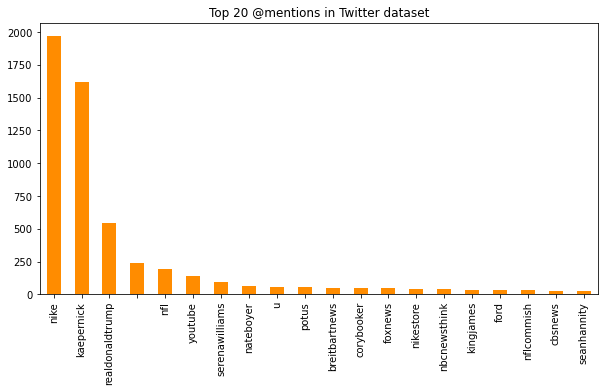

In [92]:
tagged_plot(df_tw['tweet_full_text'])

In [87]:
# Hay que escribir el @mention con mayuscula al principio porque es sensible
# @Nike 
# @Kaepernick
# @NFL
# @realDonaldTrump

Nike_df_index = tagged_index('@Nike',df_tw['tweet_full_text'])

Kaepernick_df_index = tagged_index('@Kaepernick',df_tw['tweet_full_text'])

NFL_df_index = tagged_index('@NFL',df_tw['tweet_full_text'])

realDonaldTrump_df_index = tagged_index('@realDonaldTrump',df_tw['tweet_full_text'])

print(f' Mentions founded: \n'
    f'@Nike : {len(Nike_df_index)}\n'
    f'@Kaepernick:{len(Kaepernick_df_index)}\n'
    f'@realDonaldTrump: {len(realDonaldTrump_df_index)}\n'
    f'@NFL:{len(NFL_df_index)}')
        

 Mentions founded: 
@Nike : 1861
@Kaepernick:1588
@realDonaldTrump: 554
@NFL:206


In [112]:
# Considering NFL mentions
corpus_Nike = df_tw['tweet_full_text'].iloc[Nike_df_index]

# Considering NFL mentions
corpus_Kaepernick = df_tw['tweet_full_text'].iloc[Kaepernick_df_index]

# Considering NFL mentions
corpus_NFL = df_tw['tweet_full_text'].iloc[NFL_df_index]

# Considering NFL mentions
corpus_Donald = df_tw['tweet_full_text'].iloc[realDonaldTrump_df_index]

This text Analisis running on Nike Twitts is talking about: 
Summarize for selection the and text analisis


,Comments Polarity,Porcentage
Negative,88,16.0%
Neutral,223,40.0%
Positive,243,44.0%


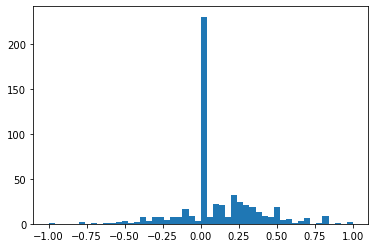

In [125]:
Corpus_sentiment =text_sentiment("",corpus_Donald)

In [127]:
message(Corpus_sentiment,"positive") 

# There are a lot of sarcasm in Donald Trump Twits

5 five best message
equality fairness best be justdoit 
 Score:1.0
---------------------------------------------------------------------------
best parody ad inspired nikeboycott maga kid know never happen though 
 Score:1.0
---------------------------------------------------------------------------
brilliant deal justdoit 🙌 
 Score:0.9
---------------------------------------------------------------------------
thing republican thinking elect you justdoit worstpresidentever 
 Score:0.8
---------------------------------------------------------------------------
happily watch montana tonight instead season opener shove colinkaepernick ad sun don ’ t shine nflkickoff nflboycott nikeboycott atlvsphi 
 Score:0.8
---------------------------------------------------------------------------
